<a href="https://colab.research.google.com/github/Mridul123941/telecom-customer-churn-analysis/blob/main/customer_churn_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
datafile = "/Telco-Customer-Churn.csv"

In [ ]:
Dataset = pd.read_csv(datafile)
Dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
print(Dataset.shape)

(7043, 21)


In [ ]:
print(Dataset.isnull().sum())
print(Dataset.describe())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


ANALYSING CHURN DISTRIBUTION

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
print(Dataset["Churn"].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


<ipython-input-11-3541737763>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn",data=Dataset,palette="coolwarm")


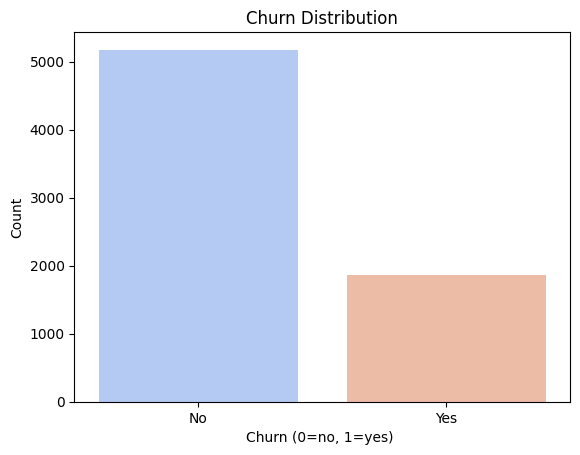

In [ ]:
sns.countplot(x="Churn",data=Dataset,palette="coolwarm")
plt.title("Churn Distribution")
plt.xlabel("Churn (0=no, 1=yes) ")
plt.ylabel("Count")
plt.show()

DATA PREPROCESSING

Handling Missing or Incorrect Values

In [ ]:
Dataset['TotalCharges'] = pd.to_numeric(Dataset['TotalCharges'], errors='coerce')
Dataset['TotalCharges'].fillna(Dataset['TotalCharges'].median(), inplace=True)

<ipython-input-12-890227006>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Dataset['TotalCharges'].fillna(Dataset['TotalCharges'].median(), inplace=True)


Handling Categorial Values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categoricals_cols = ['gender','Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
for col in categoricals_cols:
    Dataset[col]=le.fit_transform(Dataset[col])


FEATURE SELECTION AND SPLITITNG DATA

In [ ]:
from sklearn.model_selection import train_test_split
X = Dataset.drop(['customerID','Churn'],axis=1)
Y = Dataset['Churn']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state = 0)

FEATURE SCALING

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

MODEL TRAINING AND PREDICITION

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,clf.predict(X_test))
print(f"Model_accuracy: {accuracy:.2f}")

Model_accuracy: 0.79


CONFUSION AND PERFORMANCE METRICS

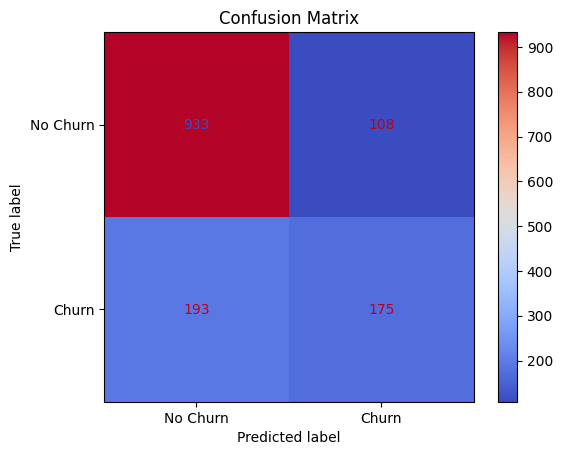

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, clf.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
disp.plot(cmap="coolwarm")
plt.title('Confusion Matrix')
plt.show()